In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.stats as st
from scipy.stats import linregress

import math as m

C:\Users\Noah\AppData\Local\Temp\ipykernel_20000\1537129069.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# E/M Ratio
Lab performed by Ben Roytblat and Noah Warren on Wednesday March 13, 2024
Lab book written by Ben Roytblat


## Part 1 -- Setup
###### A)
Located the power supply manufactured by Leybold, the mode switch stays in the up position. For the range selector we are using the upper 0-25V and 0-300V ranges. For optimum beam sharpness, we set the anode voltage to be between 150 and 250V. Before turning on the apparatus, we turned both knobs to 0. We give the filament a few minutes to warm up and give a yellow glow.When the apparatus became hot we turned on the anode voltage until the beam became visible. 
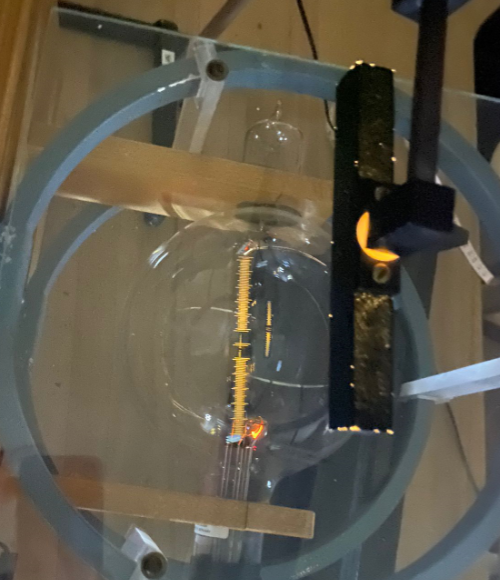

To increase the anode voltage, we rotate the anode knob clockwise, but for the grid bias we rotate the knob counter-clockwise.
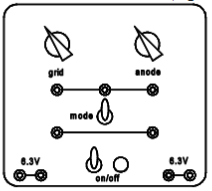
diagram taken from lab manual

###### B)
DC current for the Helmholtz field coils is adjusted by second power supply, with a rheostat in series (serving as a protection resistor in this case) and a knife switch that allows the direction of current to be reversed. When we increase the current in the coilds, the electron beam bends. We rotated the tube until there was no component of the beam parallel to the magnetic field causing spiral. 
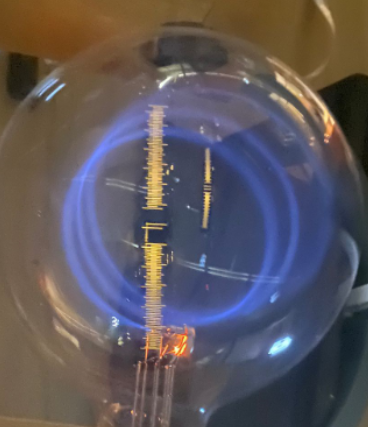

###### C)
The diameter of the beam circle is measured using the illuminated scale. we adjusted the position of the scale so that the images formed by the two surfaces of the plate glass appear parallel to each other and on each side of the plane of the electron beam, and along a diameter of the circular path of the beam. This was best determined by viewing from the side. If the scale is not in the plane of the beam then there will be a systematic error in the diameter measurements. 
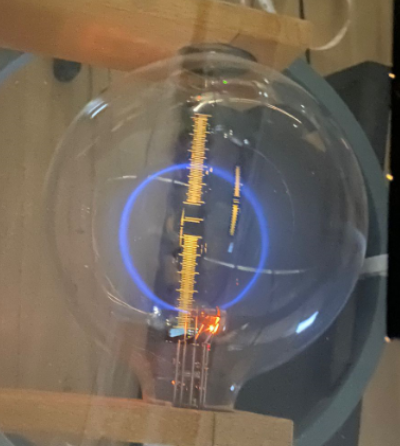



Leybold Voltage source - Part Number U4-L0775\
Bk Precision Multimeter (used for Voltage) - Part Number U4-1849\
Bk Precision Multimeter (used for current) - part number U4-1844



## Part 2 -- Accelerating voltages and coil currents for 8cm and 10cm diameter orbits

Procedure begins here

### Step 1
We set the anode voltage to 150V and increased the current in the helmholtz coil until the diameter of the electron orbit is 8cm. we rotated the tube in its wooden clamps about its long axis so that the beam forms a closed circle rather than a spiral. The spiral is of interest because it demonstrates that a velocity component parallel to the magnetic field is unaffected.

**Errors in the digital meters are to be taken as +/- 1 in the last digit. 

### Step 2
we increase the anode voltage to 250 V in 20 V increments, measuring the current required to maintain the electrons in a circular orbit with D = 8 cm. 


,Anode Voltage [V] +/- 0.5,Current Measured [A] +/- 0.004
0,148.599,1.136
1,168.498,1.224
2,188.397,1.312
3,207.702,1.395
4,227.799,1.485
5,247.500,1.563


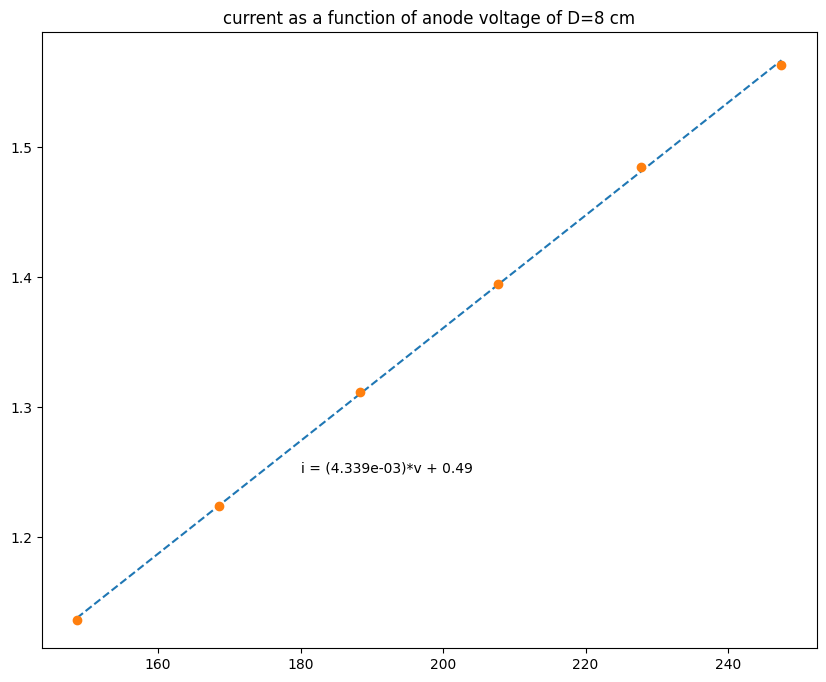

In [3]:
diameter1 = 0.08 #m +/- 0.002 (not the most accurate)

#V independant variable (increase by 20) error = +/- 0.5
anodeVoltages1 = np.array([150.1, 170.2, 190.3, 209.8, 230.1, 250.0])

# Need to correct for drop in system
anodeVoltages1 -= 0.01*anodeVoltages1

current1 = np.array([1.136, 1.224, 1.312, 1.395, 1.485, 1.563]) # Dependant variable error = +/- 0.004


linReg1 = linregress(anodeVoltages1, current1)
linRegVals1 = linReg1[0]*anodeVoltages1 + linReg1[1]


voltageCurrentTable1 = {
    'Anode Voltage [V] +/- 0.5':anodeVoltages1,
    'Current Measured [A] +/- 0.004':current1
}


table1 = pd.DataFrame(voltageCurrentTable1)
display(table1)

plt.figure(figsize=(10,8))
plt.title("current as a function of anode voltage of D=8 cm")
plt.plot(anodeVoltages1, linRegVals1, linestyle='dashed')
plt.plot(anodeVoltages1, current1, 'o')
plt.text(180, 1.25, f"i = ({linReg1[0]:.3e})*v + {linReg1[1]:.2f}")
plt.show()



readings not the most consistent because the apparatus was a little finicky

#### Question: How accurately can the diameter be reproduced and measured?
The measurement can be taken to be within 2 millimeters, we must ensure parallax is the same at all times.

### Step 3
We turn the tube 180 degrees and also reverse the direction of the current in the coils using the reversing switch. (This bends the beam into a circle with the direction of electron motion reversed)


The process in step 2 is repeated

,Anode Voltage [V] +/- 0.5,Current Measured [A] +/- 0.004
0,148.500,1.285
1,168.300,1.389
2,188.397,1.471
3,207.801,1.538
4,227.997,1.614
5,247.599,1.678


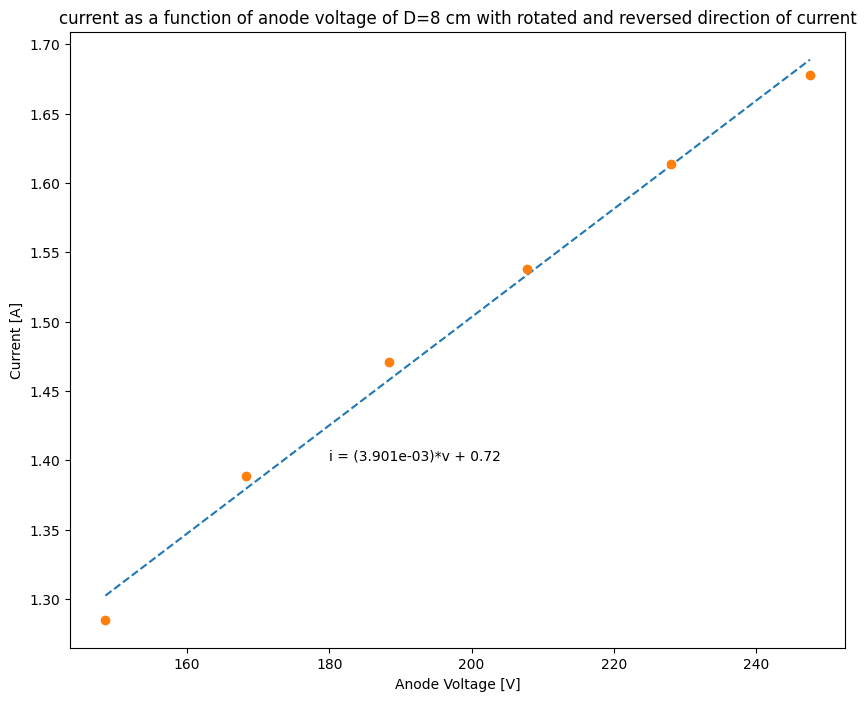

In [4]:
diameter2 = 0.08 #m +/- 0.002 (not the most accurate)

#V independant variable (increase by 20) error = +/- 0.5
anodeVoltages2 = np.array([150.0, 170.0, 190.3, 209.9, 230.3, 250.1]) 

# correcting for resistance
anodeVoltages2 -= 0.01*anodeVoltages2


current2 = np.array([1.285, 1.389, 1.471, 1.538, 1.614, 1.678]) # Dependant variable error = +/- 0.004


linReg2 = linregress(anodeVoltages2, current2)
linRegVals2 = linReg2[0]*anodeVoltages2 + linReg2[1]

voltageCurrentTable2 = {
    'Anode Voltage [V] +/- 0.5':anodeVoltages2,
    'Current Measured [A] +/- 0.004':current2
}


table2 = pd.DataFrame(voltageCurrentTable2)
display(table2)

plt.figure(figsize=(10,8))

plt.plot(anodeVoltages2, linRegVals2, linestyle='dashed')
plt.title("current as a function of anode voltage of D=8 cm with rotated and reversed direction of current")
plt.plot(anodeVoltages2, current2, 'o')
plt.xlabel('Anode Voltage [V]')
plt.ylabel('Current [A]')
plt.text(180, 1.4, f"i = ({linReg2[0]:.3e})*v + {linReg2[1]:.2f}")
plt.show()

### Step 4
The steps 1 to 3 are repeated but now with a D=10cm



,Anode Voltage [V] +/- 0.5,Current Measured [A] +/- 0.004
0,150.2,0.929
1,170.0,1.011
2,190.2,1.078
3,209.9,1.141
4,229.9,1.193
5,250.1,1.247


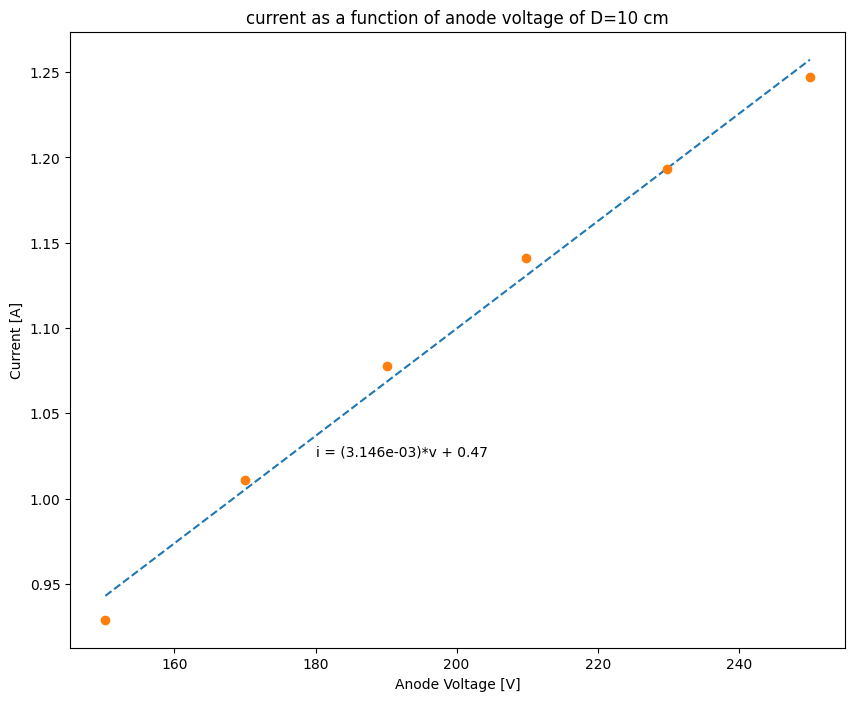

In [5]:
diameter3 = 0.1 #m
anodeVoltages3 = np.array([150.2, 170.0, 190.2, 209.9, 229.9, 250.1]) #V independant variable (increase by 20) error = +/- 0.5
current3 = np.array([0.929, 1.011, 1.078, 1.141, 1.193, 1.247]) # Dependant variable error = +/- 0.004


linReg3 = linregress(anodeVoltages3, current3)
linRegVals3 = linReg3[0]*anodeVoltages3 + linReg3[1]

voltageCurrentTable3 = {
    'Anode Voltage [V] +/- 0.5':anodeVoltages3,
    'Current Measured [A] +/- 0.004':current3
}


table3 = pd.DataFrame(voltageCurrentTable3)
display(table3)

plt.figure(figsize=(10,8))
plt.title("current as a function of anode voltage of D=10 cm")
plt.plot(anodeVoltages3, linRegVals3, linestyle='dashed')
plt.plot(anodeVoltages3, current3, 'o')
plt.xlabel('Anode Voltage [V]')
plt.ylabel('Current [A]')
plt.text(180, 1.025, f"i = ({linReg3[0]:.3e})*v + {linReg3[1]:.2f}")
plt.show()

,Anode Voltage [V] +/- 0.5,Current Measured [A] +/- 0.004
0,150.0,1.060
1,169.8,1.133
2,190.0,1.192
3,210.0,1.259
4,230.1,1.317
5,250.0,1.371


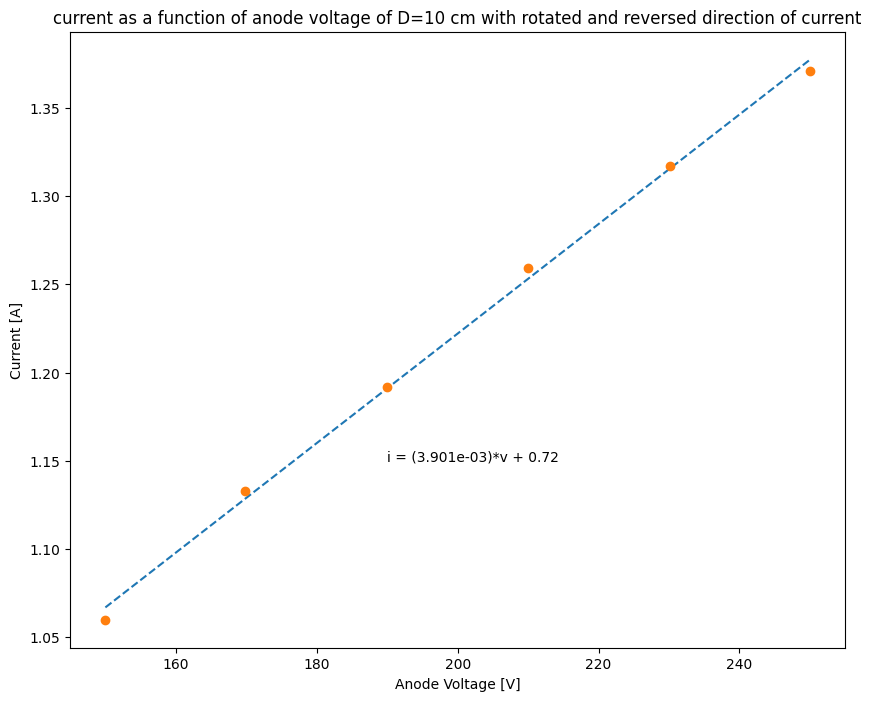

In [6]:
# Measuring current as a function of the voltage for the diameter of the circle path of 10 cm with rotated and reversed direction of current 

diameter4 = 0.1 #m
anodeVoltages4 = np.array([150.0, 169.8, 190.0, 210.0, 230.1, 250.0]) #V independant variable (increase by 20) error = +/- 0.5
current4 = np.array([1.060, 1.133, 1.192, 1.259, 1.317, 1.371]) # Dependant variable error = +/- 0.004

linReg4 = linregress(anodeVoltages4, current4)
linRegVals4 = linReg4[0]*anodeVoltages4 + linReg4[1]


voltageCurrentTable4 = {
    'Anode Voltage [V] +/- 0.5':anodeVoltages4,
    'Current Measured [A] +/- 0.004':current4,
    
}


table4 = pd.DataFrame(voltageCurrentTable4)
display(table4)

plt.figure(figsize=(10,8))
plt.title("current as a function of anode voltage of D=10 cm with rotated and reversed direction of current")
plt.plot(anodeVoltages4, linRegVals4, linestyle='dashed')
plt.plot(anodeVoltages4, current4, 'o')
plt.xlabel('Anode Voltage [V]')
plt.ylabel('Current [A]')
plt.text(190, 1.15, f"i = ({linReg2[0]:.3e})*v + {linReg2[1]:.2f}")
plt.show()

#### Question: Which, if either, of the two orbit diameters is closest to being symmetric about the centre of the coils? Is this an important or negligible effect?

The 10cm is more symmetric around the coil so in theory the results should be more accurate. If it is perfectly centered better results. Because the coils are circuilar than the magnetic field generated between them is radially symmetric, therefore if it is centered then the field will act on all points around the beam.

### After the experiment setup
We are not to disconnect the leads but ensure that the power supply and the coil current are switched off. The reversing switch is in the central position.


## Analysis

### For B_E
Table below is provided by the lab manual to know what B/B_0 value to use for calculations
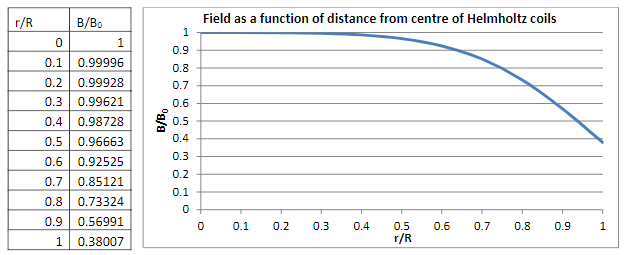


### 10cm Diameter Data Test Validation

In [7]:
# For calculated magnetic field of earth

r = 0.05 #m
R = 0.154 #m

roverR = r/R
print(f"r/R = {roverR:.4e}")

# using graph provided in the lab book field ratio (B/B_0) is equal to 0.99621
BoverB0 = 0.99621
# k_r = (B/B_0)*k  (where k = 7.73x10^-4)
k = 7.73e-4
Kr = BoverB0 * k

# since we are aligned with magnetic north, we need to find the difference in required current of the opposing directions
difference = np.abs(current3[0]-current4[0])

# field of the earth = (K_r)/2 * current difference

earthField = (Kr/2)*difference
print(f"B_E = {earthField:.4e}")

r/R = 3.2468e-01
B_E = 5.0440e-05


Using graph provided in the lab book field ratio (B/B_0) is equal to 0.99621 because the r/R is in 0.325

since we are aligned with magnetic north, we need to find the difference in required current of the opposing directions

the field of the earth = (K_r)/2 * difference in current

**using https://www.magnetic-declination.com/, the magnetic field strength is 53114.3 nT. Through calculation we get a magnetic field strength of 50439.6 nT.
The two values are within 10%.**


### For e/m ratio

In [8]:
# For calculated e/m ratio

k = 7.73e-4
BoverB0 = 0.99621
Kr = BoverB0 * k
currentSum = np.abs(current3[0]+current4[0])
B_t = currentSum*(Kr/2)

eoverm = (2*anodeVoltages3[0])/((B_t**2)*(0.05**2))
print(f"e/m = {eoverm:.4e}")

e/m = 2.0488e+11


## For e/m ratio
**the online value of e/m is 1.7588x10^11 C/kg. 
THe value we got was 2.0488x10^11**

the two values are within 10%.

# For r=8cm

## Test 1 - in-line with earth's b-field

,Anode Voltage [V] +/- 0.5,Current Measured [A] +/- 0.004
0,148.599,1.136
1,168.498,1.224
2,188.397,1.312
3,207.702,1.395
4,227.799,1.485
5,247.500,1.563


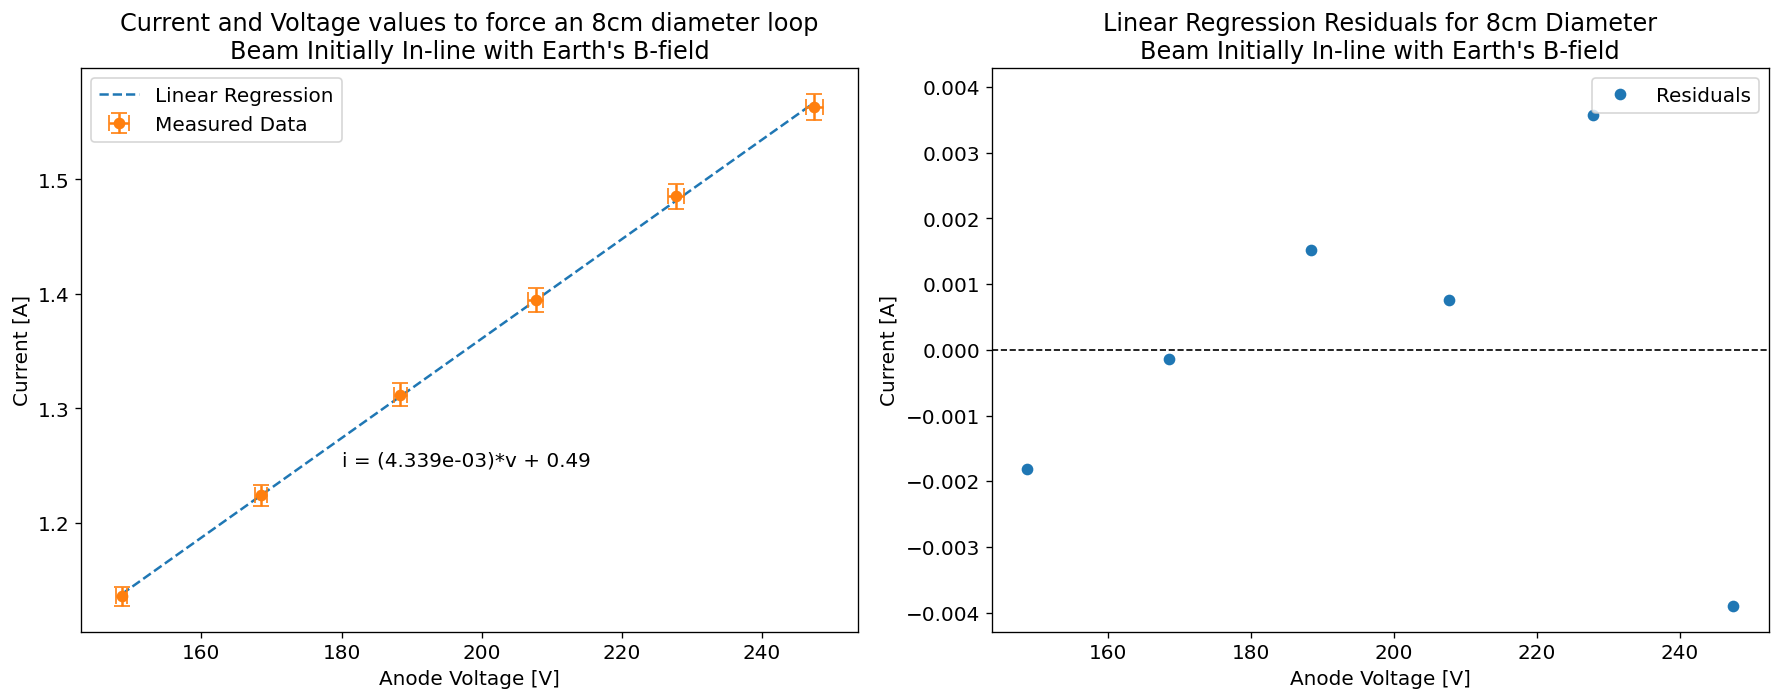

In [9]:
diameter1 = 0.08 #m +/- 0.002 (not the most accurate)

#V independant variable (increase by 20) error = +/- 0.5%
anodeVoltages1 = np.array([150.1, 170.2, 190.3, 209.8, 230.1, 250.0])*0.99 # *0.99 to correct for resistances in the system

# Dependant variable error = +/- 0.004
current1 = np.array([1.136, 1.224, 1.312, 1.395, 1.485, 1.563]) 

linReg1 = linregress(anodeVoltages1, current1)
linRegVals1 = linReg1[0]*anodeVoltages1 + linReg1[1]

residuals1 = current1 - linRegVals1

voltageCurrentTable1 = {
    'Anode Voltage [V] +/- 0.5':anodeVoltages1,
    'Current Measured [A] +/- 0.004':current1
}


table1 = pd.DataFrame(voltageCurrentTable1)
display(table1)

plt.rcParams.update({'font.size': 12}) # keep those graph fonts readable!
plt.rcParams['figure.dpi'] = 120 # plot resolution

fig, (dataPlot, residualsPlot) = plt.subplots(1, 2, figsize=(15,6))

dataPlot.set(title="Current and Voltage values to force an 8cm diameter loop\nBeam Initially In-line with Earth's B-field",
              xlabel="Anode Voltage [V]", ylabel="Current [A]")
dataPlot.plot(anodeVoltages1, linRegVals1, linestyle='dashed', label="Linear Regression")

voltageErrors = anodeVoltages1*0.005 # 0.5% measurement error
currentErrors = current1*0.0075 # 0.75% measurement error
dataPlot.errorbar(anodeVoltages1, current1, xerr=voltageErrors, yerr=currentErrors, fmt='o', label="Measured Data", capsize=5)

dataPlot.text(180, 1.25, f"i = ({linReg1[0]:.3e})*v + {linReg1[1]:.2f}")
dataPlot.legend()

residualsPlot.set(title="Linear Regression Residuals for 8cm Diameter\nBeam Initially In-line with Earth's B-field", xlabel="Anode Voltage [V]", ylabel="Current [A]")
residualsPlot.plot(anodeVoltages1, residuals1, 'o', label="Residuals")
residualsPlot.axhline(0, color='black', linestyle='--', linewidth=1)
maxVal = np.max(np.abs(residuals1))*1.1 # Extend it a bit past the max value
residualsPlot.set_ylim(-maxVal, maxVal)
residualsPlot.legend()

plt.tight_layout()



## Test 2 - Opposite earth's B-field

,Anode Voltage [V] +/- 0.5,Current Measured [A] +/- 0.004
0,148.500,1.285
1,168.300,1.389
2,188.397,1.471
3,207.801,1.538
4,227.997,1.614
5,247.599,1.678


<Figure size 1200x960 with 0 Axes>

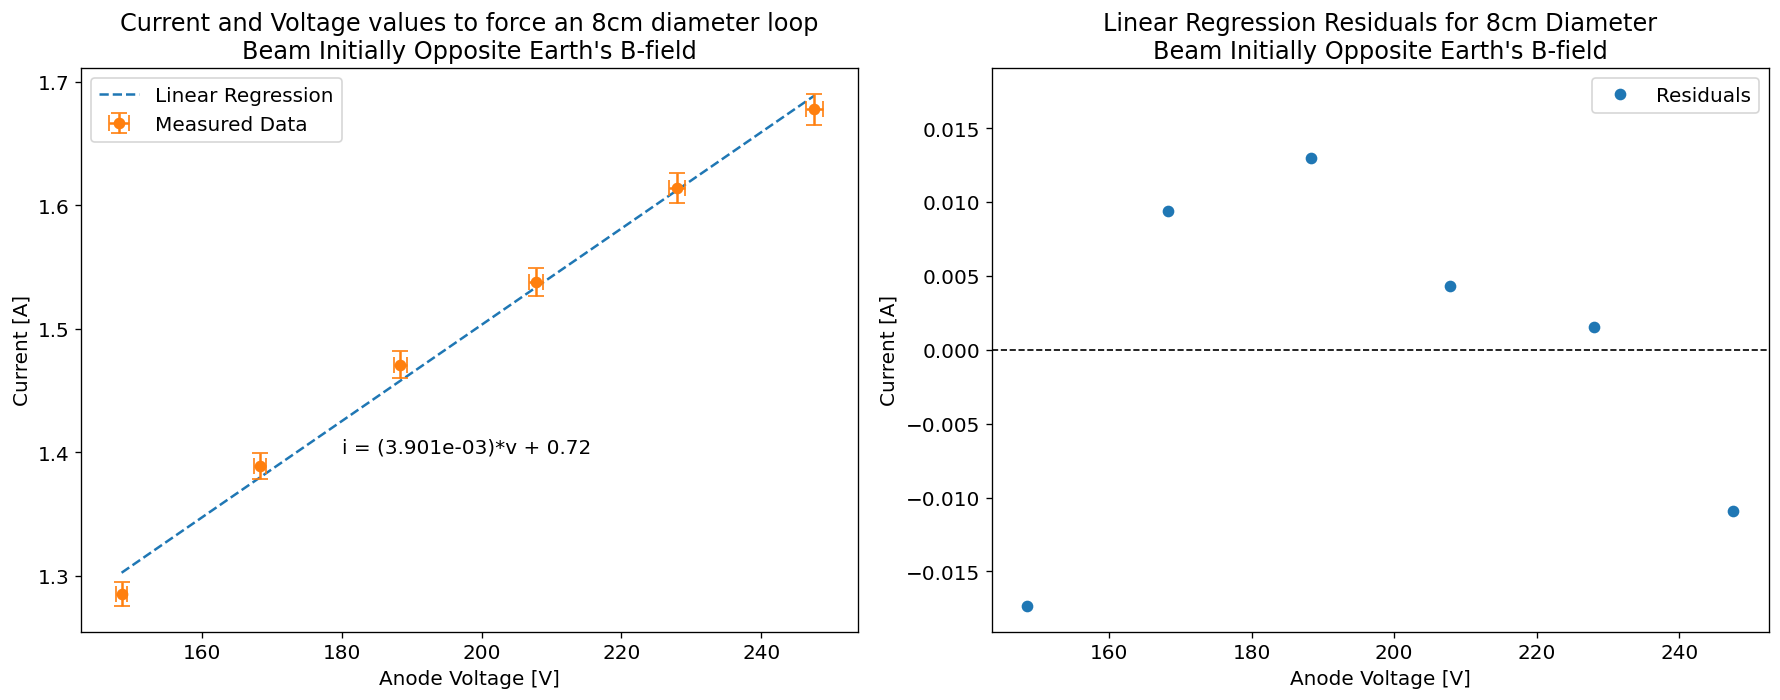

In [10]:
diameter2 = 0.08 #m +/- 0.002 (not the most accurate)
anodeVoltages2 = np.array([150.0, 170.0, 190.3, 209.9, 230.3, 250.1])*0.99 #V independant variable (increase by 20) error = +/- 0.5
current2 = np.array([1.285, 1.389, 1.471, 1.538, 1.614, 1.678]) # Dependant variable error = +/- 0.004


linReg2 = linregress(anodeVoltages2, current2)
linRegVals2 = linReg2[0]*anodeVoltages2 + linReg2[1]

residuals2 = current2 - linRegVals2

voltageCurrentTable2 = {
    'Anode Voltage [V] +/- 0.5':anodeVoltages2,
    'Current Measured [A] +/- 0.004':current2
}


table2 = pd.DataFrame(voltageCurrentTable2)
display(table2)

plt.figure(figsize=(10,8))

plt.rcParams.update({'font.size': 12}) # keep those graph fonts readable!
plt.rcParams['figure.dpi'] = 120 # plot resolution

residuals2 = current2 - linRegVals2

fig, (dataPlot, residualsPlot) = plt.subplots(1, 2, figsize=(15,6))

dataPlot.set(title="Current and Voltage values to force an 8cm diameter loop\nBeam Initially Opposite Earth's B-field",
              xlabel="Anode Voltage [V]", ylabel="Current [A]")
dataPlot.plot(anodeVoltages2, linRegVals2, linestyle='dashed', label="Linear Regression")

voltageErrors = anodeVoltages2*0.005 # 0.5% measurement error
currentErrors = current2*0.0075 # 0.75% measurement error
dataPlot.errorbar(anodeVoltages2, current2, xerr=voltageErrors, yerr=currentErrors, fmt='o', label="Measured Data", capsize=5)

dataPlot.text(180, 1.4, f"i = ({linReg2[0]:.3e})*v + {linReg2[1]:.2f}")
dataPlot.legend()

residualsPlot.set(title="Linear Regression Residuals for 8cm Diameter\nBeam Initially Opposite Earth's B-field",
                  xlabel="Anode Voltage [V]", ylabel="Current [A]")
residualsPlot.plot(anodeVoltages2, residuals2, 'o', label="Residuals")
residualsPlot.axhline(0, color='black', linestyle='--', linewidth=1)
maxVal = np.max(np.abs(residuals2))*1.1 # Extend it a bit past the max value
residualsPlot.set_ylim(-maxVal, maxVal)
residualsPlot.legend()

plt.tight_layout()


In [11]:
# For calculated magnetic field of earth

r = 0.04 #m
R = 0.154 #m

roverR = r/R
print(f"r/R = {roverR:.4e}")

# using graph provided in the lab book field ratio (B/B_0) is equal to 0.99621
BoverB0 = 0.997
# BoverB0 = (0.99928+0.99621)/2
# k_r = (B/B_0)*k  (where k = 7.73x10^-4)
k = 7.73e-4
Kr = BoverB0 * k

print(f"Kr4 = {Kr}")

# since we are aligned with magnetic north, we need to find the difference in required current of the opposing directions

totals = []  
differences= []
B_e = []
B_t = []
eoverm=[]


for i in range (0,6):
    differences =  np.append(differences, np.abs(current2[i]-current1[i]))
    totals = np.append(totals, np.abs(current1[i]+current2[i]))
    B_e = np.append(B_e, (Kr/2)*differences[i])
    B_t = np.append(B_t, totals[i]*(Kr/2))
    eoverm = np.append(eoverm, (2*anodeVoltages1[i])/((B_t[i]**2)*(0.04**2)))

    
# field of the earth = (K_r)/2 * current difference

BeError = 2.7268e-6
# earthField = np(Kr/2)*difference
# print(f"B_E = {earthField:.4e}")
print(f"B_t Values = {B_t}")
print(f"B_e Values = {B_e}")
print(f"e/m Values = {eoverm}")

B_eAvg1 = np.mean(B_e)
eovermAvg1 = np.mean(eoverm)

print(f"B_e avg = {B_eAvg1}")
print(f"e/m avg = {eovermAvg1}")

# For calculated e/m ratio


# eoverm = (2*170)/((B_t**2)*(0.04**2))
# print(f"e/m = {eoverm:.4e}")

r/R = 2.5974e-01
Kr4 = 0.0007706810000000001
B_t Values = [0.00093291 0.00100689 0.0010724  0.0011302  0.00119417 0.00124889]
B_e Values = [5.74157345e-05 6.35811825e-05 6.12691395e-05 5.51036915e-05
 4.97089245e-05 4.43141575e-05]
e/m Values = [2.13425844e+11 2.07747894e+11 2.04770915e+11 2.03253135e+11
 1.99677606e+11 1.98352574e+11]
B_e avg = 5.523213833333334e-05
e/m avg = 204537994650.6849


# For r=10cm

## Test 1 - In-line with earth's B-field

,Anode Voltage [V] +/- 0.5,Current Measured [A] +/- 0.004
0,148.698,0.929
1,168.300,1.011
2,188.298,1.078
3,207.801,1.141
4,227.601,1.193
5,247.599,1.247


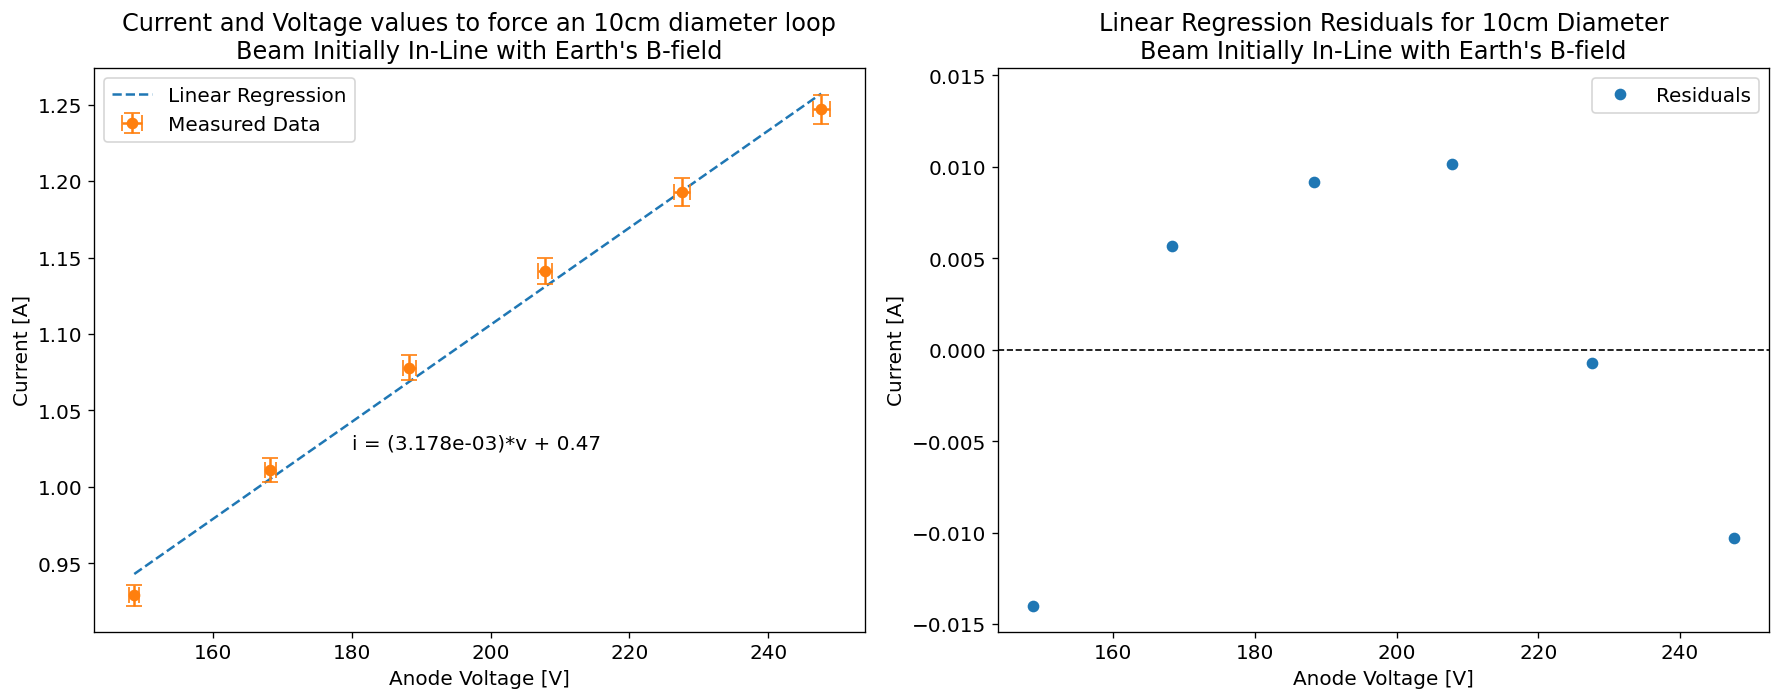

In [34]:
diameter3 = 0.1 #m
anodeVoltages3 = np.array([150.2, 170.0, 190.2, 209.9, 229.9, 250.1])*0.99 #V independant variable (increase by 20) error = +/- 0.5
current3 = np.array([0.929, 1.011, 1.078, 1.141, 1.193, 1.247]) # Dependant variable error = +/- 0.004


linReg3 = linregress(anodeVoltages3, current3)
linRegVals3 = linReg3[0]*anodeVoltages3 + linReg3[1]

voltageCurrentTable3 = {
    'Anode Voltage [V] +/- 0.5':anodeVoltages3,
    'Current Measured [A] +/- 0.004':current3
}


table3 = pd.DataFrame(voltageCurrentTable3)
display(table3)

residuals3 = current3 - linRegVals3



fig, (dataPlot, residualsPlot) = plt.subplots(1, 2, figsize=(15,6))

dataPlot.set(title="Current and Voltage values to force an 10cm diameter loop\nBeam Initially In-Line with Earth's B-field",
              xlabel="Anode Voltage [V]", ylabel="Current [A]")
dataPlot.plot(anodeVoltages3, linRegVals3, linestyle='dashed', label="Linear Regression")

voltageErrors = anodeVoltages3*0.005 # 0.5% measurement error
currentErrors = current3*0.0075 # 0.75% measurement error
dataPlot.errorbar(anodeVoltages3, current3, xerr=voltageErrors, yerr=currentErrors, fmt='o', label="Measured Data", capsize=5)

dataPlot.text(180, 1.025, f"i = ({linReg3[0]:.3e})*v + {linReg3[1]:.2f}")
dataPlot.legend()

residualsPlot.set(title="Linear Regression Residuals for 10cm Diameter\nBeam Initially In-Line with Earth's B-field",
                  xlabel="Anode Voltage [V]", ylabel="Current [A]")
residualsPlot.plot(anodeVoltages3, residuals3, 'o', label="Residuals")
residualsPlot.axhline(0, color='black', linestyle='--', linewidth=1)

maxVal = np.max(np.abs(residuals3))*1.1 # Extend it a bit past the max value
residualsPlot.set_ylim(-maxVal, maxVal)
residualsPlot.legend()

plt.tight_layout()


## Test 2 - Opposite Earth's B-field

,Anode Voltage [V] +/- 0.5,Current Measured [A] +/- 0.004
0,148.500,1.060
1,168.102,1.133
2,188.100,1.192
3,207.900,1.259
4,227.799,1.317
5,247.500,1.371


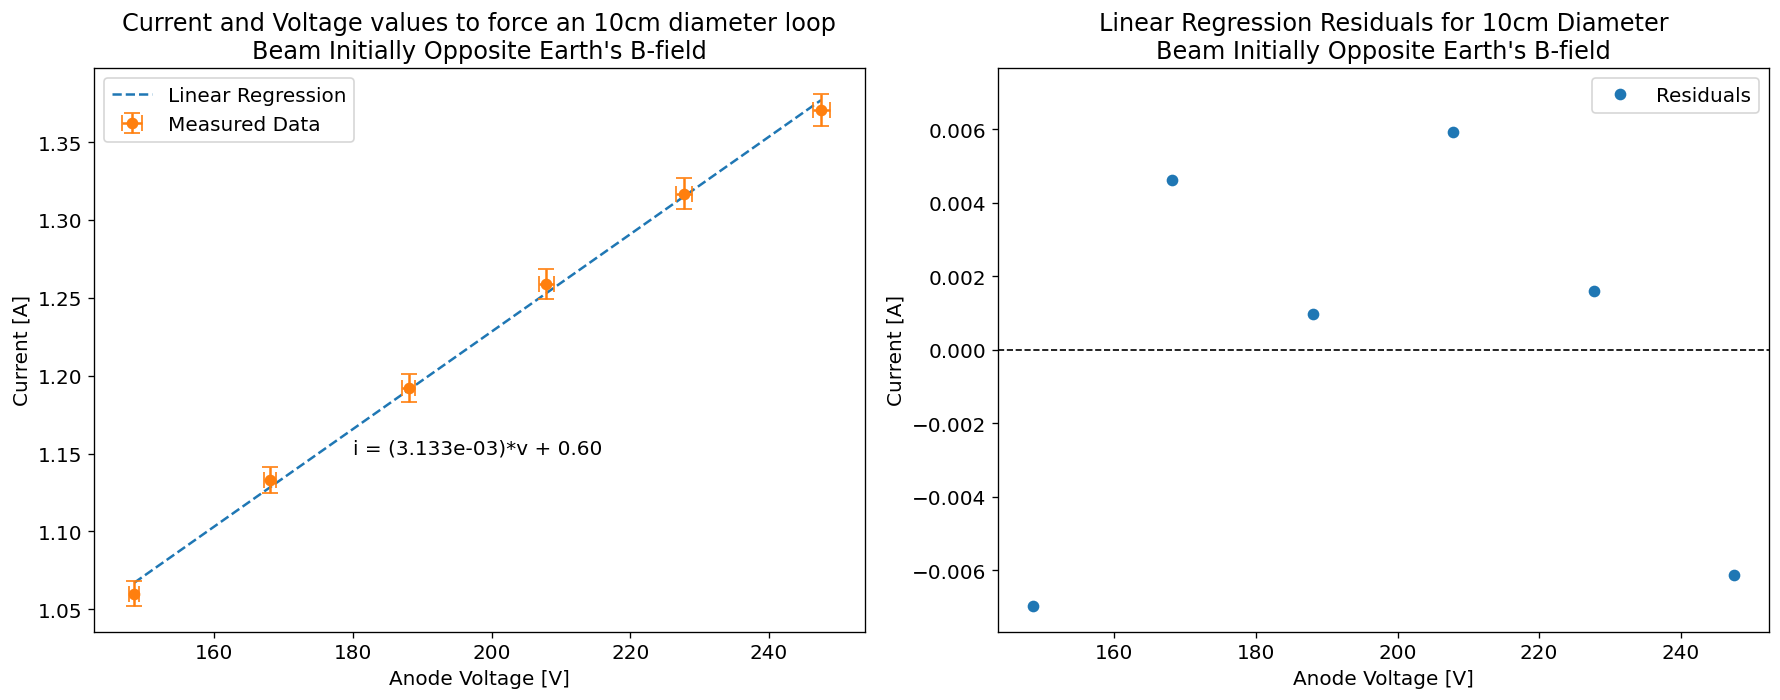

In [35]:
# Measuring current as a function of the voltage for the diameter of the circle path of 10 cm with rotated and reversed direction of current 

diameter4 = 0.1 #m
anodeVoltages4 = np.array([150.0, 169.8, 190.0, 210.0, 230.1, 250.0])*0.99 #V independant variable (increase by 20) error = +/- 0.5
current4 = np.array([1.060, 1.133, 1.192, 1.259, 1.317, 1.371]) # Dependant variable error = +/- 0.004

linReg4 = linregress(anodeVoltages4, current4)
linRegVals4 = linReg4[0]*anodeVoltages4 + linReg4[1]


voltageCurrentTable4 = {
    'Anode Voltage [V] +/- 0.5':anodeVoltages4,
    'Current Measured [A] +/- 0.004':current4,
    
}

table4 = pd.DataFrame(voltageCurrentTable4)
display(table4)

residuals4 = current4 - linRegVals4

fig, (dataPlot, residualsPlot) = plt.subplots(1, 2, figsize=(15,6))

dataPlot.set(title="Current and Voltage values to force an 10cm diameter loop\nBeam Initially Opposite Earth's B-field",
              xlabel="Anode Voltage [V]", ylabel="Current [A]")
dataPlot.plot(anodeVoltages4, linRegVals4, linestyle='dashed', label="Linear Regression")

voltageErrors = anodeVoltages4*0.005 # 0.5% measurement error
currentErrors = current4*0.0075 # 0.75% measurement error
dataPlot.errorbar(anodeVoltages4, current4, xerr=voltageErrors, yerr=currentErrors, fmt='o', label="Measured Data", capsize=5)

dataPlot.text(180, 1.15, f"i = ({linReg4[0]:.3e})*v + {linReg4[1]:.2f}")
dataPlot.legend()

residualsPlot.set(title="Linear Regression Residuals for 10cm Diameter\nBeam Initially Opposite Earth's B-field",
                   xlabel="Anode Voltage [V]", ylabel="Current [A]")
residualsPlot.plot(anodeVoltages4, residuals4, 'o', label="Residuals")
residualsPlot.axhline(0, color='black', linestyle='--', linewidth=1)
maxVal = np.max(np.abs(residuals4))*1.1 # Extend it a bit past the max value
residualsPlot.set_ylim(-maxVal, maxVal)
residualsPlot.legend()

plt.tight_layout()

In [37]:
# For calculated magnetic field of earth

r = 0.05 #m
R = 0.154 #m

roverR = r/R
print(f"r/R = {roverR:.4e}")

# using graph provided in the lab book field ratio (B/B_0) is equal to 0.99621
BoverB0 = 0.994
# k_r = (B/B_0)*k  (where k = 7.73x10^-4)
k = 7.73e-4
Kr = BoverB0 * k
print(f"Kr5 = {Kr}")

difference = np.abs(current3[0]-current4[0])
# since we are aligned with magnetic north, we need to find the difference in required current of the opposing directions
# difference = 0
# total = 0
# c3Sum = 0
# c4Sum = 0
# for i in range (0,6):
#     c3Sum = c3Sum + current3[i]
#     c4Sum = c4Sum + current4[i]
#     difference = difference + np.abs(current3[i]-current4[i])
#     total = total + np.abs(current3[i]+current4[i])

    
totals = []  
differences= []
B_e = []
B_t = []
eoverm=[]


for i in range (0,6):
    differences =  np.append(differences, np.abs(current4[i]-current3[i]))
    totals = np.append(totals, np.abs(current3[i]+current4[i]))
    B_e = np.append(B_e, (Kr/2)*differences[i])
    B_t = np.append(B_t, totals[i]*(Kr/2))
    eoverm = np.append(eoverm, (2*anodeVoltages3[i])/((B_t[i]**2)*(0.05**2)))

    
print(B_e)
print(eoverm)

B_eAvg2 = np.mean(B_e)
eovermAvg2 = np.mean(eoverm)

print(B_eAvg2)
print(eovermAvg2)

    
    
# total = total/6
# difference = difference/6
# # field of the earth = (K_r)/2 * current difference

# print(c3Sum/6)
# print(c4Sum/6)
# earthField = (Kr/2)*difference
# print(f"B_E = {earthField:.4e}")



# # For calculated e/m ratio
# B_t = total*(Kr/2)

# eoverm = (2*200)/((B_t**2)*(0.05**2))
# print(f"e/m = {eoverm:.4e}")

r/R = 3.2468e-01
Kr5 = 0.0007683620000000001
[5.0327711e-05 4.6870082e-05 4.3796634e-05 4.5333358e-05 4.7638444e-05
 4.7638444e-05]
[2.03729436e+11 1.98450764e+11 1.98067041e+11 1.95543494e+11
 1.95814544e+11 1.95806824e+11]
4.693411216666665e-05
197902017247.50992


In [43]:
print(f"All B_e average = {(B_eAvg1+B_eAvg2)/2}")
print(f"All e/m average = {(eovermAvg1+eovermAvg2)/2}")


R = 0.154 # +/- 0.005 [m]
b = 0.15/2 # +/- 0.005 [m]
mu0 = m.pi*4e-7 # [H/m]
n = 130 # turns
K = (mu0 * n * R**2)/(((R**2)+(b**2))**(3/2))

print(f"Calculated K value: {K}")

All B_e average = 5.108312525e-05
All e/m average = 201220005949.0974
Calculated K value: 0.0007708720348426913
